# Dependencies

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv(r'C:\Users\GeneralInChief\Downloads\Compressed\ml-latest-small\ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movie_titles = pd.read_csv(r'C:\Users\GeneralInChief\Downloads\Compressed\ml-latest-small\movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Since the movieId columns are the same we can merge these datasets on this column.

In [4]:
df = pd.merge(df, movie_titles, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# We group the dataset by the title column and compute its mean to obtain the average rating for each movie.

In [6]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


# We group by the title column and then use the count utility to calculate the number of ratings each movie got.
# Afterwards we view the new dataframe by using head().

In [7]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


# Now, let’s plot a Histogram using pandas plotting utility to visualize the distribution of ratings.

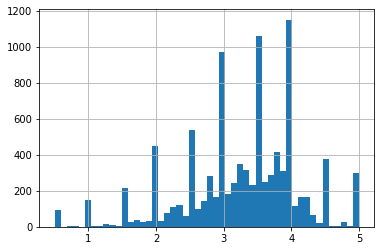

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

# As we can see that most of the movies are rated between 2.5 and 4. Next let’s visualize the number_of_ratings column in as similar manner.

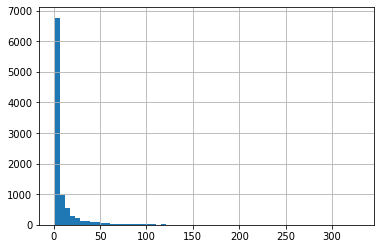

In [9]:
ratings['number_of_ratings'].hist(bins=60)

# Let’s now check the relationship between the rating of a movie and the number of ratings. 

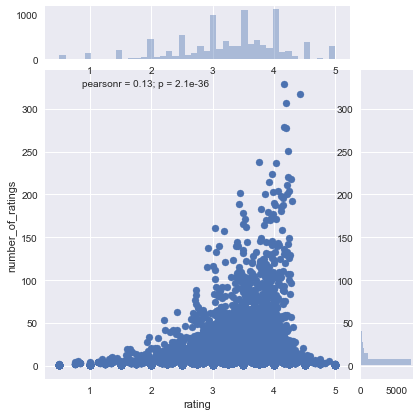

In [10]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

# Create pivot table which have users as index, movies as columns and ratings as values this makes table in this format [user (i) gives movie (j) with (v) rate]

In [11]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Next let’s look at the most rated movies and choose two of them to work with in this simple recommender system.

In [12]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


# users rated movie 'Air Force One (1997)' and users rated movie 'Contact (1997)'

In [13]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

# In order to compute the correlation between two columns we use pandas corwith functionality.

In [14]:
similar_to_air_force_one = movie_matrix.corrwith(AFO_user_rating)

In [15]:
similar_to_air_force_one.sort_values(ascending=False)

title
Let It Ride (1989)                                        1.0
Stepford Wives, The (1975)                                1.0
Saving Silverman (Evil Woman) (2001)                      1.0
Batman Beyond: Return of the Joker (2000)                 1.0
Sudden Impact (1983)                                      1.0
                                                         ... 
[REC]² (2009)                                             NaN
[REC]³ 3 Génesis (2012)                                   NaN
anohana: The Flower We Saw That Day - The Movie (2013)    NaN
xXx: State of the Union (2005)                            NaN
À nous la liberté (Freedom for Us) (1931)                 NaN
Length: 9719, dtype: float64

In [16]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

In [17]:
similar_to_contact.sort_values(ascending=False)

title
Thomas Crown Affair, The (1968)                           1.0
Return of Jafar, The (1994)                               1.0
High Crimes (2002)                                        1.0
Principal, The (1987)                                     1.0
Atlantic City (1980)                                      1.0
                                                         ... 
[REC]² (2009)                                             NaN
[REC]³ 3 Génesis (2012)                                   NaN
anohana: The Flower We Saw That Day - The Movie (2013)    NaN
xXx: State of the Union (2005)                            NaN
À nous la liberté (Freedom for Us) (1931)                 NaN
Length: 9719, dtype: float64

# As noticed earlier our matrix had very many missing values since not all the movies were rated by all the users. We drop those null values and transform correlation results into dataframes to make the results look more appealing.

In [18]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
print (corr_contact.head())

corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
print (corr_AFO.head())

                                   Correlation
title                                         
'burbs, The (1989)                    0.486761
(500) Days of Summer (2009)           0.634064
*batteries not included (1987)        0.868599
...And Justice for All (1979)         1.000000
10 Things I Hate About You (1999)    -0.102640
                                correlation
title                                      
'burbs, The (1989)                 0.168459
(500) Days of Summer (2009)        0.086874
*batteries not included (1987)    -0.866025
10 Cloverfield Lane (2016)         0.192450
10 Items or Less (2006)           -1.000000


In [19]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_AFO .head()
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


# From the histogram earlier we saw a sharp decline in number of ratings from 50. We shall therefore set this as the threshold to filter recommended movies.

In [22]:
corr_AFO[corr_AFO['number_of_ratings'] > 50].sort_values(by='correlation', ascending=False).head()

,correlation,number_of_ratings
title,,
Air Force One (1997),1.000000,58
Tombstone (1993),0.823566,65
First Knight (1995),0.774474,54
Disclosure (1994),0.757937,52
City Slickers II: The Legend of Curly's Gold (1994),0.738997,55


In [23]:
corr_contact[corr_contact['number_of_ratings'] > 50].sort_values(by='Correlation', ascending=False).head()

,Correlation,number_of_ratings
title,,
Contact (1997),1.000000,82
"Wolf of Wall Street, The (2013)",0.875113,54
Disclosure (1994),0.765532,52
First Knight (1995),0.731463,54
Coneheads (1993),0.712202,63


# Once again we get different results. The most similar movie to Contact (1997) is Wolf of Wall Street, The (2013) with a correlation coefficient of 0.875 with 54 ratings. So if somebody liked Contact (1997) we can recommend the above movies to them.

# Obviously this is a very simple way of building recommender system and is no where close to industry standards.


# This system can be improved by building a Memory-Based Collaborative Filtering based system. In this case we’d divide the data into a training set and a test set. We’d then use techniques such as cosine similarity to compute the similarity between the movies. An alternative is to build a Model-based Collaborative Filtering system. This is based on matrix factorization. Matrix factorization is good at dealing with scalability and sparsity than the former. You can then evaluate your model using techniques such as Root Mean Squared Error(RMSE).